Using the Burr3 model of response, we simulate the response of low pT jets, in order to determine which is the best correcion factor: 1/mean? 1/mode? etc

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

import numpy as np
import scipy.stats
from scipy.optimize import minimize

from collections import OrderedDict
import math
from itertools import izip
from copy import deepcopy

In [2]:
mpl.rcParams['figure.figsize'] = (9.0, 5.0)  # default size of plots
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 16

In [3]:
# fit params from that othe rnotebook investigating diff fit funcs
frozen_fit = scipy.stats.burr(3.7989036602894894, 0.57362014248279913, 
                             loc=0.00912127339789, scale=0.500232499187)
r = frozen_fit.rvs(size=100000)

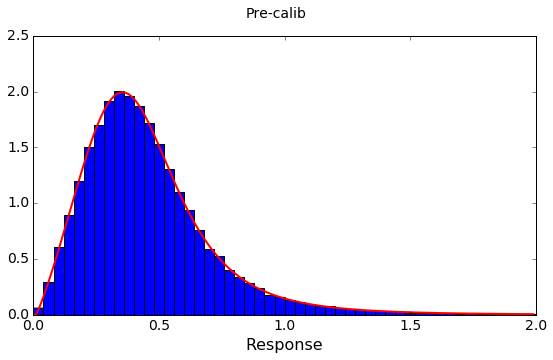

In [4]:
_ = plt.hist(r, bins=50, range=[0,2], normed=True)
xvals = np.arange(0, 2, 0.01)
plt.plot(xvals, frozen_fit.pdf(xvals), 'r', linewidth=2)
plt.xlabel('Response')
plt.suptitle('Pre-calib')

Applying factor 2.17154175685


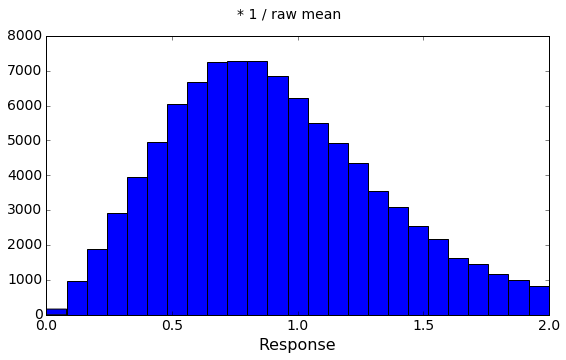

In [5]:
r_apply_raw_mean = r/np.mean(r)
print 'Applying factor', 1./np.mean(r)
_ = plt.hist(r_apply_raw_mean, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle('* 1 / raw mean')

Applying factor 2.17476662361


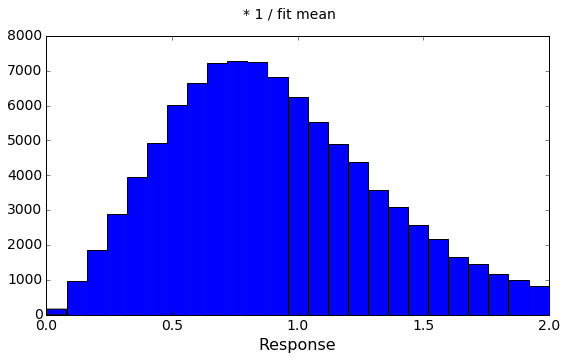

In [6]:
r_apply_mean = r / frozen_fit.stats(moments='m')
print 'Applying factor', 1. / frozen_fit.stats(moments='m')
_ = plt.hist(r_apply_mean, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle('* 1 / fit mean')

Applying factor 2.8182563714


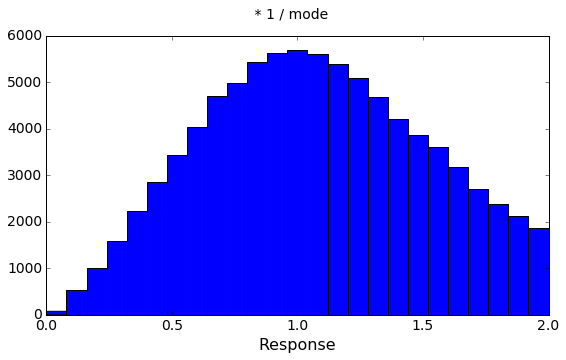

In [7]:
max_result = minimize(lambda x: -1. * frozen_fit.pdf(x), x0=.5)
mode = max_result.x[0]
print 'Applying factor', 1./mode
r_apply_mode = r/mode
_ = plt.hist(r_apply_mode, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * 1 / mode')

Applying factor 2.44685060562


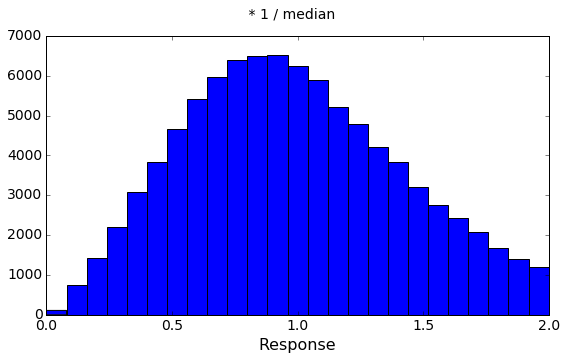

In [8]:
median = frozen_fit.median()
print 'Applying factor', 1./median
r_apply_median = r/median
_ = plt.hist(r_apply_median, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * 1 / median')

In [9]:
r_inv = 1./r

In [10]:
inv_fit_results = scipy.stats.burr.fit(r_inv)
frozen_fit_inv = scipy.stats.burr(inv_fit_results[0], inv_fit_results[1], 
                                  loc=inv_fit_results[2], scale=inv_fit_results[3])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:956: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2225: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


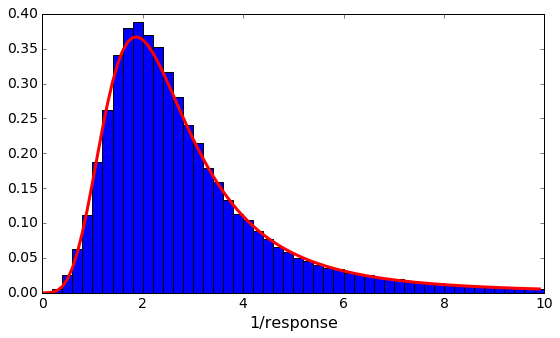

In [11]:
n, bins, patches = plt.hist(r_inv, bins=50, range=[0, 10], normed=True)
bin_cent = np.arange(0, 10, 0.1)
plt.plot(bin_cent, frozen_fit_inv.pdf(bin_cent), 'r', linewidth=3)
plt.xlabel('1/response')

Applying factor 1.8689082404


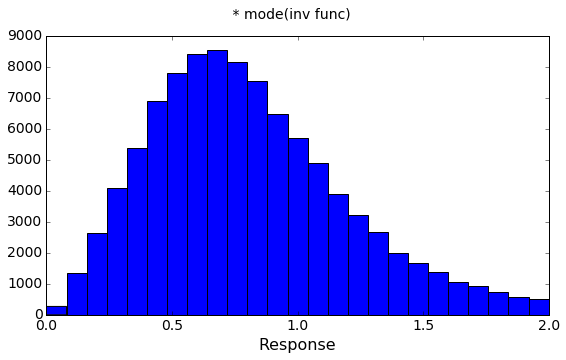

In [12]:
max_result_inv = minimize(lambda x: -1. * frozen_fit_inv.pdf(x), x0=1)
mode_inv = max_result_inv.x[0]
r_apply_inv_mode = r * mode_inv
print 'Applying factor', mode_inv
_ = plt.hist(r_apply_inv_mode, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * mode(inv func)')

In [13]:
frozen_fit_inv.stats(moments='m')

array(3.1140255126305942)

Applying factor 3.11402551263


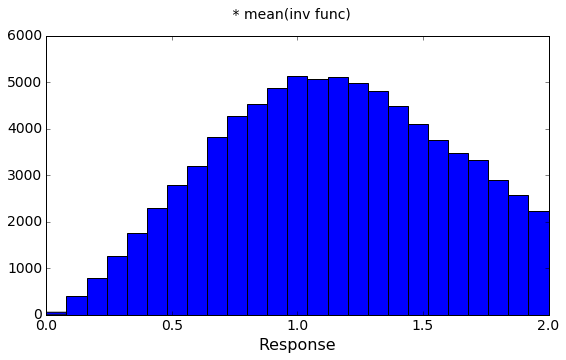

In [14]:
mean_inv = frozen_fit_inv.stats(moments='m')
r_apply_inv_mean = r * mean_inv
print 'Applying factor', mean_inv
_ = plt.hist(r_apply_inv_mean, bins=25, range=[0,2]) #, histtype='step', label='* mean(inv func)', linewidth=2)
# _ = plt.hist(r_apply_mode, bins=25, range=[0,2], histtype='step', label='/ mode(func)', linewidth=2)
plt.xlabel('Response')
plt.suptitle(' * mean(inv func)')
# plt.legend(loc='best')

Applying factor 2.45920934453


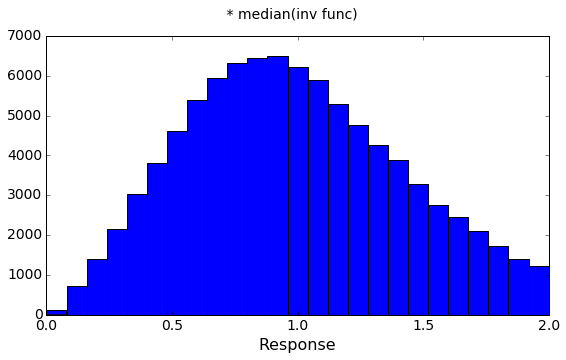

In [15]:
median_inv = frozen_fit_inv.median()
r_apply_inv_median = r * median_inv
print 'Applying factor', median_inv
_ = plt.hist(r_apply_inv_median, bins=25, range=[0,2])
plt.xlabel('Response')
plt.suptitle(' * median(inv func)')

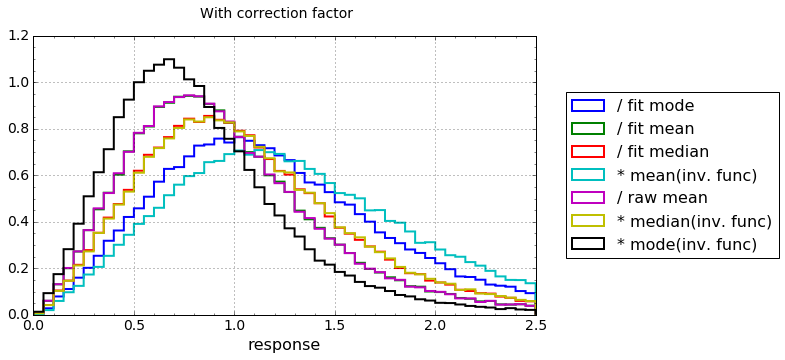

In [16]:
corrected = {
    '/ raw mean': r_apply_raw_mean,
    '/ fit mean': r_apply_mean,
    '/ fit mode': r_apply_mode,
    '/ fit median': r_apply_median,
    '* mode(inv. func)': r_apply_inv_mode,
    '* mean(inv. func)': r_apply_inv_mean,
    '* median(inv. func)': r_apply_inv_median
}
for name, arr in corrected.iteritems():
    plt.hist(arr, bins=50, range=[0,2.5], histtype='step', linewidth=2, label=name, normed=True)
plt.xlabel('response')
plt.legend(loc='center right', fontsize=16, bbox_to_anchor=(1.5, 0.5))
plt.suptitle('With correction factor')
plt.grid(which='major')
plt.minorticks_on()

Let's see if the post-corrected spectrum is Gaussian. Not really :(

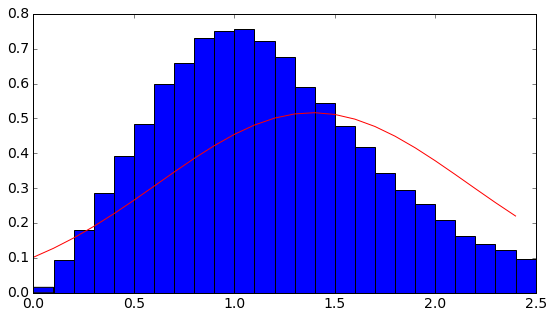

In [17]:
gaus = scipy.stats.norm.fit(r_apply_mode[(r_apply_mode<15) & (r_apply_mode>0.5)])

plt.hist(r_apply_mode, bins=25, range=[0,2.5], normed=True)
frozen_gaus = scipy.stats.norm(*gaus)
x = np.arange(0, 2.5, 0.1)
plt.plot(x, frozen_gaus.pdf(x), 'r')

Try fitting over partial range doesn't seem to work...

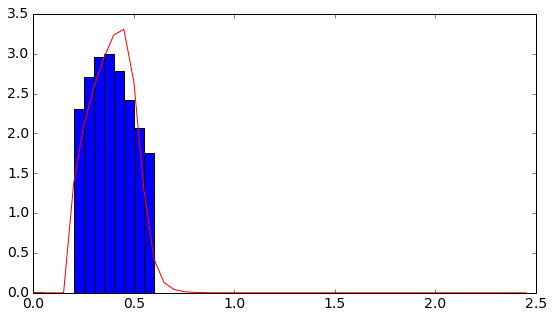

In [18]:
b = scipy.stats.burr.fit(r[(r<0.6) & (r>0.2)])

plt.hist(r[(r<0.6) & (r>0.2)], bins=50, range=[0,2.5], normed=True)
frozen = scipy.stats.burr(b[0], b[1], loc=b[2], scale=b[3])
x = np.arange(0, 2.5, 0.05)
plt.plot(x, frozen.pdf(x), 'r')

# The ROOT version

In [5]:
import ROOT

Welcome to ROOTaaS 6.06/04


In [73]:
ROOT.gStyle.SetOptFit(1111)

In [6]:
burr3_fit = ROOT.TF1("burr3", "[2]*[0]*[1]*pow((x-[3])/[4], -1.-[0]) / pow(1+pow((x-[3])/[4], -[0]), 1+[1] )", 0, 2)
burr3_fit.SetNpx(1000)

In [7]:
burr3_fit.SetParameter(0, 3.64850e+00)
burr3_fit.SetParameter(1, 7.06077e-01)
burr3_fit.SetParameter(2, 1.28317e+04)
burr3_fit.SetParameter(3, -1.50503e-02)
burr3_fit.SetParameter(4, 4.87032e-01)


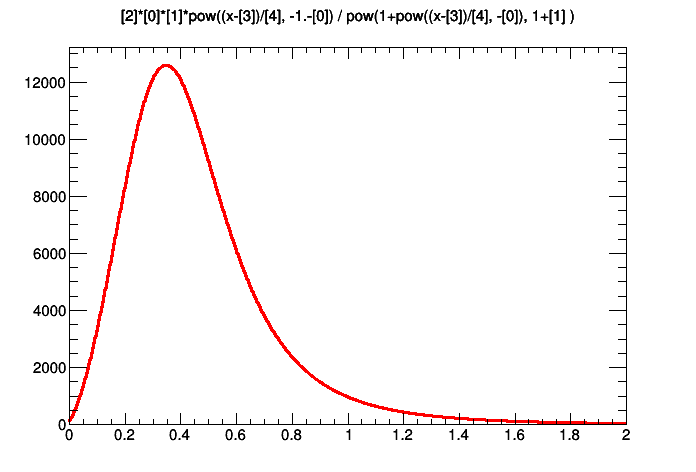

In [35]:
c = ROOT.TCanvas()
c.SetTicks(1, 1)
burr3_fit.Draw()
c.Draw()

In [36]:
hrsp = ROOT.TH1F("hrsp", ";response;", 50, 0, 2)
for x in r:
    hrsp.Fill(x)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hrsp (Potential memory leak).


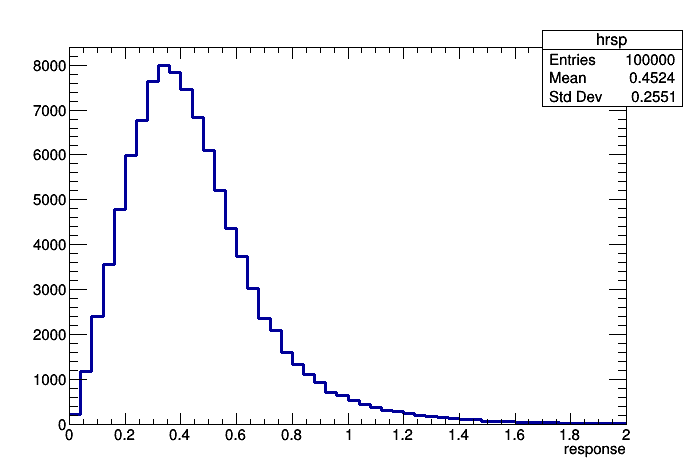

In [37]:
hrsp.Draw()
c.Draw()

In [74]:
burr_fit_l = burr3_fit.Clone("burr_fit")
burr_fit_l.SetParameter(2, 800)
fit_result = hrsp.Fit(burr_fit_l, 'LES')
hrsp.SetTitle("Burr3: Likelihood fit")

 FCN=244.977 FROM MINOS     STATUS=SUCCESSFUL    242 CALLS        2213 TOTAL
                     EDM=6.42697e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.66853e+00   5.71535e-01   3.40000e-05  -4.78131e-04
   2  p1           4.33332e+00   5.88692e-01  -2.16918e-05  -8.09773e-04
   3  p2           3.32711e+03   2.53622e+02   3.80262e-02  -2.25560e-06
   4  p3          -1.06989e+00   1.15532e-01   6.89189e-07  -1.59149e-02
   5  p4           1.20407e+00   9.13612e-02   9.13612e-02  -2.31858e+00
                               ERR DEF= 0.5


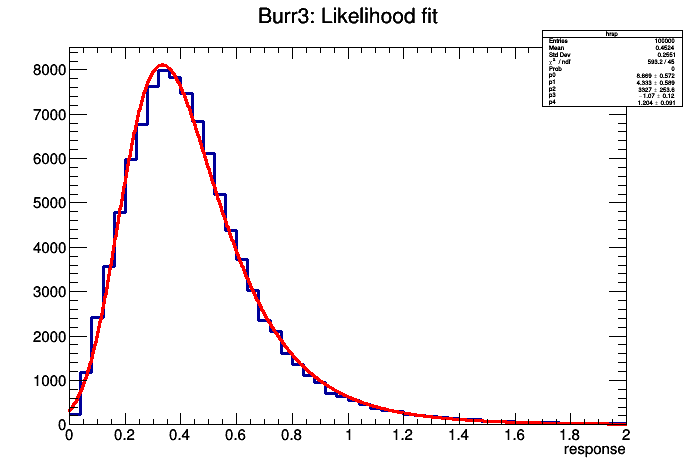

In [75]:
hrsp.Draw()
c.Draw()

In [76]:
burr_fit_chi2 = burr3_fit.Clone("burr_fit")
burr_fit_chi2.SetParameter(2, 800)
burr_fit_chi2.SetLineColor(ROOT.kGreen+2)
fit_result = hrsp.Fit(burr_fit_chi2, 'ES')
hrsp.SetTitle("Burr3: chi2 fit")

 FCN=54.2086 FROM MINOS     STATUS=SUCCESSFUL     37 CALLS        1021 TOTAL
                     EDM=4.83225e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.83513e+00   2.31155e-02   6.08112e-05   9.76208e-02
   2  p1           5.68027e-01   8.13049e-03   4.66321e-05  -1.51187e-01
   3  p2           7.93352e+03   4.36766e+01   8.75129e-02   1.09440e-05
   4  p3           6.84540e-03   1.30604e-03  -1.19285e-08   1.66879e+00
   5  p4           5.03916e-01   2.24239e-03   2.24239e-03  -2.52489e-01


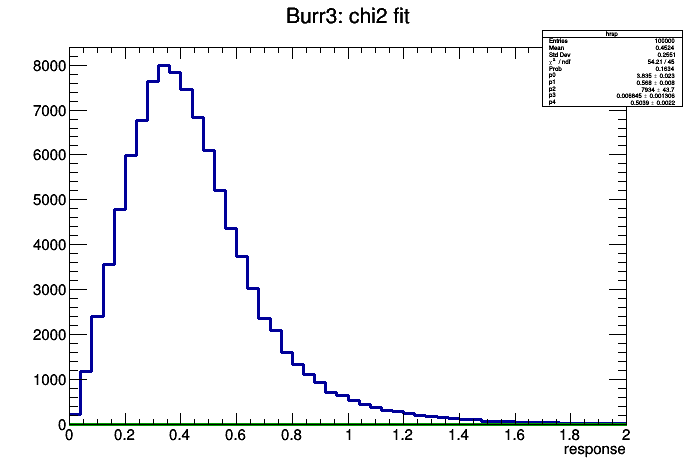

In [77]:
hrsp.Draw()
c.Draw()

In [78]:
burr_fit_chi2_pearson = burr3_fit.Clone("burr_fit")
burr_fit_chi2_pearson.SetParameter(2, 800)
burr_fit_chi2_pearson.SetLineColor(ROOT.kOrange)
fit_result = hrsp.Fit(burr_fit_chi2_pearson, 'PES')
hrsp.SetTitle("Burr3: Pearson chi2 fit")

 FCN=47.0263 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        1180 TOTAL
                     EDM=7.74775e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.81689e+00   2.31107e-02   1.74533e-05  -4.27699e-02
   2  p1           5.72385e-01   8.28606e-03   4.57648e-05  -1.18600e+00
   3  p2           7.95371e+03   4.41749e+01   2.09760e-01  -9.97100e-06
   4  p3           6.64962e-03   1.30530e-03   9.07064e-08  -1.55307e+00
   5  p4           5.03066e-01   2.26808e-03   2.26808e-03  -3.33566e-01


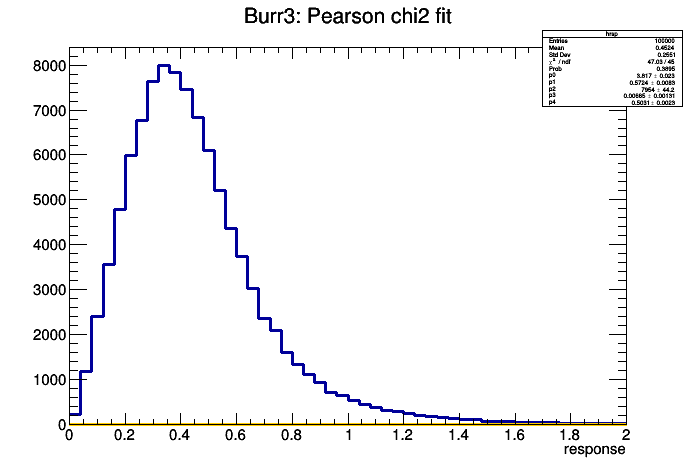

In [79]:
hrsp.Draw()
c.Draw()

In [80]:
burr12_fit = ROOT.TF1("burr12", "[2]*[0]*[1]*pow((x-[3])/[4], [0]-1.) / pow(1+pow((x-[3])/[4], [0]), 1+[1] )", 0, 2)
burr12_fit.SetParameter(0, 2.96)
burr12_fit.SetParameter(1, 1.31)
burr12_fit.SetParameter(2, 367)
burr12_fit.SetParameter(3, 0)
burr12_fit.SetParameter(4, 1.01)


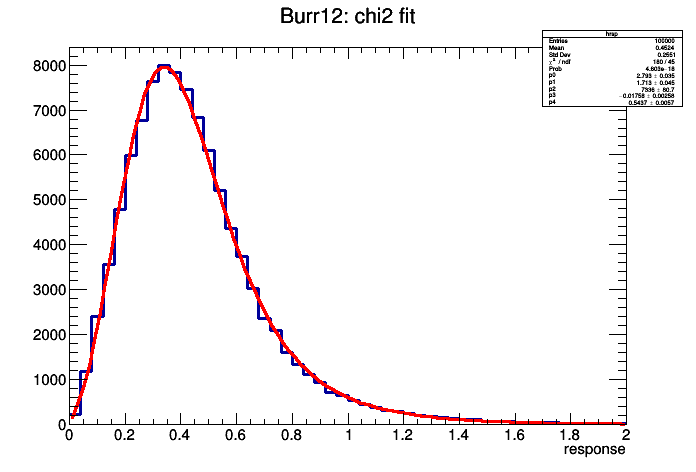

 FCN=180.037 FROM MINOS     STATUS=SUCCESSFUL    101 CALLS        1313 TOTAL
                     EDM=5.43374e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.79320e+00   3.51672e-02   9.65677e-05  -1.18479e-02
   2  p1           1.71254e+00   4.51038e-02  -3.85544e-05   3.24931e-02
   3  p2           7.33635e+03   8.06684e+01  -4.45529e-02  -1.53780e-06
   4  p3          -1.75773e-02   2.58268e-03  -8.04250e-06  -2.89315e-01
   5  p4           5.43703e-01   5.66859e-03   5.66859e-03   4.11695e+00


In [81]:
fit_result = hrsp.Fit(burr12_fit.Clone(), 'ES')
hrsp.SetTitle("Burr12: chi2 fit")
hrsp.Draw()
c.Draw()

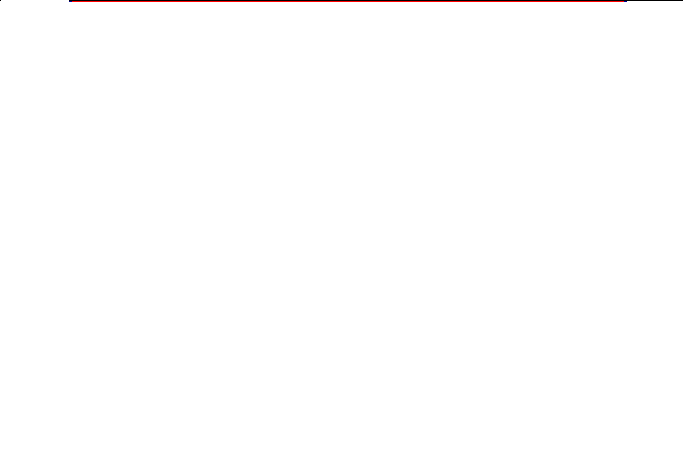

 FCN=0 FROM MINOS     STATUS=FAILURE       258 CALLS        1813 TOTAL
                     EDM=0    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.76502e+00   3.55200e+00  -0.00000e+00   0.00000e+00
   2  p1          -4.45514e+00   1.41421e+00   2.00000e+00   0.00000e+00
   3  p2           1.11811e+04   1.41421e+00   1.41421e+00   0.00000e+00
   4  p3          -9.53657e-03   1.41421e+00   1.41421e+00   0.00000e+00
   5  p4          -4.33494e-01   1.41421e+00   1.41421e+00   0.00000e+00


In [82]:
fit_result = hrsp.Fit(burr12_fit.Clone(), 'ESP')
hrsp.SetTitle("Burr12: Pearson chi2 fit")
hrsp.Draw()
c.Draw()

Fit:0: RuntimeWarning: Abnormal termination of minimization.


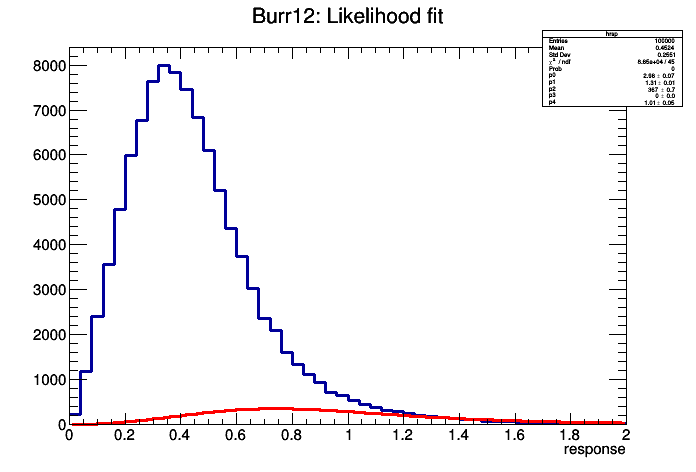

 FCN=242557 FROM MIGRAD    STATUS=FAILED         75 CALLS          76 TOTAL
                     EDM=1.97702e+06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.96000e+00   7.26191e-02   0.00000e+00   5.24168e+04
   2  p1           1.31000e+00   5.89691e-03  -0.00000e+00  -6.03231e+04
   3  p2           3.67000e+02   6.77124e-01   0.00000e+00  -2.47986e+02
   4  p3           0.00000e+00   7.76017e-04  -0.00000e+00   4.98461e+05
   5  p4           1.01000e+00   4.69208e-02  -0.00000e+00   1.20645e+05
                               ERR DEF= 0.5


In [83]:
fit_result = hrsp.Fit(burr12_fit.Clone(), 'ESL')
hrsp.SetTitle("Burr12: Likelihood fit")
hrsp.Draw()
c.Draw()